In [29]:
!pip install adjustText

In [1]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from adjustText import adjust_text

# --- 1. Define Ontologies ---

In [2]:
# LLM-generated sample ontology (concept: definition)
sample_llm_ontology = {
    "Microbes": "Organisms that are microscopic, such as bacteria, archaea, and certain fungi, present in the aquifer systems.",
    "AquiferSystem": "An underground layer of water-bearing permeable rock or materials such as gravel, sand, or silt.",
    "ChemicalCompound": "A substance consisting of two or more different elements chemically bonded together, found in groundwater.",
    "KarstAquifer": "A type of aquifer characterized by soluble rock layers like limestone, leading to distinctive topographies and hydrology due to dissolution and water flow.",
    "MicrobialFunctionalGuilds": "Groups of microorganisms categorized by their metabolic or functional roles within ecological communities.",
    "AquiferChemistry": "Chemical characteristics and processes occurring within an aquifer, including solute transport and reactions.",
    "LimestoneAquifer": "An aquifer consisting predominantly of limestone, which is highly permeable due to the presence of dissolution-formed conduits.",
    "TriassicAquifer": "An aquifer system formed during the Triassic period, often characterized by specific sedimentary rock formations.",
    "GroundwaterQuality": "The condition of groundwater, often assessed by chemical, physical, and biological parameters to determine suitability for use.",
    "FracturedRock": "Rock formations that have significant fracture systems, influencing groundwater flow and storage.",
    "KarstSystem": "A geological system formed from the dissolution of soluble rocks including limestone, dolomite, and gypsum, characterized by sinkholes, caves, and underground drainage.",
    "CarbonateDissolution": "A process where carbonate minerals (e.g., calcite, dolomite) dissolve in water, significantly affecting karst aquifer systems.",
    "Karstification": "The process of creating karst landscapes through the dissolution of soluble rocks, leading to features like caves and underground rivers.",
    "MobileOrganicMatter": "Organic materials within the groundwater that are mobile and can transport nutrients or pollutants.",
    "Groundwater": "Water located beneath the earth's surface in soil pore spaces and in the fractures of rock formations.",
    "AgriculturalActivity": "Farming practices and operations that can impact environmental quality, including groundwater systems, through the use of fertilizers, pesticides, and water management.",
    "GroundwaterEcosystem": "An ecological system located below the earth's surface, encompassing interactions among water, microorganisms, chemicals, and geological materials.",
    "GeologicalStrata": "Layers of sedimentary rock or soil with consistent characteristics that can influence groundwater movement and storage.",
    "GroundwaterPrecipitation": "The process where water precipitates, either through chemical means within groundwater systems or as a part of the hydrological cycle impacting groundwater recharge.",
    "CatchmentArea": "The area from which rainfall and surface water flow into a particular river, lake, or reservoir.",
    "InfiltrationArea": "Areas of land where water permeates the soil surface to enter an aquifer, significantly impacting groundwater recharge and quality.",
    "RockType": "Categories of rocks based on their origin, texture, and mineral composition that influence geological and hydrological properties.",
    "Mineral": "Naturally occurring inorganic substances with a definite chemical composition and physical properties that are part of the earth's crust.",
    "OrganicGroundwaterComponent": "Organic substances found in groundwater, including both naturally occurring compounds and contaminants.",
    "Biodiversity": "The variety and variability of life forms within a given ecosystem, region, or on the entire Earth, important in assessing the health and function of ecosystems.",
    "Vegetation": "Plants and trees that cover a portion of the earth's surface, influencing ecological balances and processes including hydrology.",
    "Terrain": "The physical landscape including its elevation, slope, and orientation, which influences water flow and ecological conditions.",
    "ManagementPractice": "Approaches and techniques used in managing natural resources and environmental quality, including water resources.",
    "MicrobialDynamics": "Changes and interactions among microbial populations within an environment, often influenced by physical and chemical conditions.",
    "HainichCriticalZone": "A specific geographic area used for studying the critical zone, which includes the earth's outer skin where interactions occur between the lithosphere, atmosphere, hydrosphere, and biosphere.",
    "MolecularMarker": "Biomolecules used as markers to identify and track genetic material, species identification, or processes within ecosystems.",
    "NitrogenTransformation": "Biochemical processes that convert nitrogen into various chemical forms, critical in nutrient cycling and ecological balance.",
    "MarinePhage": "Viruses that infect marine bacteria, playing roles in marine ecosystems by influencing bacterial populations and nutrient cycles.",
    "SoilTracerStudy": "Research studies that use tracers to analyze soil properties, such as permeability and solute transport, to better understand soil-water interactions.",
    "DOM": "Dissolved organic matter in water, which includes a complex mixture of organic compounds that affects water chemistry and microbial activity.",
    "Miz": "A specific type of organic or chemical marker used in studies of environmental samples to track changes or origins of substances.",
    "MolecularFormula": "A representation of the number and type of atoms in a molecule, providing essential information about chemical structures in environmental studies.",
    "SoilChemistry": "The study of the chemical characteristics and processes of soil, including nutrient content, pH, and contaminant levels.",
    "GroundwaterChemistry": "The chemical composition and properties of groundwater, including solutes and gases, which affect its quality and ecological role.",
    "CO2FixationPathway": "Biochemical routes by which CO2 is converted into organic molecules by living organisms, crucial for carbon cycling and storage.",
    "RareSpeciesBiodiversity": "The presence and roles of rare species within an ecosystem, which can be indicators of environmental health and stability.",
    "HydrogeochemicalCharacterizationMethod": "Techniques used to assess the chemical properties and interactions in groundwater systems, important for understanding water quality and geological impacts.",
    "MultilevelGroundwaterSystem": "A groundwater system that includes multiple aquifer layers, often interconnected, allowing for complex flow and solute transport dynamics.",
    "Permeability": "A measure of the ability of a material (such as soil or rock) to allow fluids to pass through it, crucial for assessing aquifer recharge and water movement.",
    "GroundwaterVulnerability": "The susceptibility of groundwater to contamination, influenced by geological, hydrological, and chemical factors.",
    "GroundwaterContamination": "The presence of harmful substances in groundwater, which can compromise water quality and ecosystem health.",
    "SeasonalVariation": "Changes in environmental conditions or processes that occur on a seasonal cycle, affecting ecosystems and biological responses.",
    "NitrogenCycle": "The series of processes by which nitrogen is converted into its various chemical forms, crucial for life on Earth.",
    "ForestEcosystem": "An ecological system within a forest setting, encompassing the interactions among plants, animals, microorganisms, and their environment.",
    "VegetationCover": "The layer of vegetation that covers a portion of the earth's surface, providing habitat, regulating water flow, and influencing climate.",
    "VegetationType": "Categories of vegetation defined by the plant species composition, often associated with specific climatic, geographical, or ecological conditions.",
    "SoilGroundwaterInteraction": "The processes and relationships between soil characteristics and groundwater movement and quality, key for managing water resources and ecological health.",
    "MicrobialCommunity": "A community of microorganisms, including bacteria, fungi, and viruses, living in a shared environment, influencing ecological processes and cycles.",
    "SoilWaterContent": "The amount of water contained within the soil, crucial for understanding soil health, plant growth, and hydrological processes.",
    "Production": "The creation or manufacture of substances or materials, often used in the context of biological or chemical processes in environmental systems.",
    "Consumption": "The use or depletion of resources or energy, commonly in biological contexts such as metabolism or ecological interactions.",
    "TraceGas": "Gases present in small amounts in the atmosphere, significant for their roles in chemical processes and climate dynamics.",
    "EnvironmentalSignal": "Natural or anthropogenic indicators that provide information about environmental conditions or changes, used for monitoring and management purposes.",
    "SamplingMethod": "Techniques used to collect samples from environmental media (water, soil, air) for analysis or study.",
    "AnalysisMethod": "Techniques used to examine samples in order to discover their composition, structure, or properties, often used in scientific research.",
    "BioticFactor": "A living element of an ecosystem that influences or interacts with other organisms and the environment, such as plants, animals, and microorganisms.",
    "AbioticFactor": "Non-living chemical and physical parts of the environment that affect living organisms and the functioning of ecosystems.",
    "SpatialPattern": "The arrangement or distribution of particular phenomena or entities in physical space, significant in studies of ecology and geographical sciences.",
    "TemporalPattern": "The distribution of events or phenomena over time, relevant in ecological, geological, and climatological studies.",
    "SoilOrganicMatter": "Organic materials in soil, including decomposed plant and animal residues, which influence soil fertility, structure, and function.",
    "Bioturbation": "The disturbance of sedimentary deposits by living organisms, often affecting soil composition and structure.",
    "AgriculturalPractice": "Methods and techniques employed in cultivation and livestock rearing, which impact environmental quality and productivity.",
    "EnergyMetabolismPathway": "Biochemical routes by which organisms transform energy from one form to another, crucial for cellular processes and ecological dynamics.",
    "MicrobialMechanism": "Mechanisms or processes employed by microorganisms to interact with their environment, affecting ecological balances and nutrient cycles.",
    "HydrologicalProperty": "Characteristics of the movement, distribution, and quality of water through the Earth's atmosphere and surface, key to understanding hydrological cycles and systems.",
    "MuschelkalkFormation": "A geological formation consisting mainly of middle Triassic limestone, known for its distinct sedimentary characteristics.",
    "GroundwaterFlow": "The movement of water through aquifer systems, driven by gradients in pressure and elevation, crucial for water supply and ecosystem support.",
    "HydraulicProperty": "Properties of materials related to the movement and storage of fluids, particularly water, essential in hydrogeology and civil engineering.",
    "WaterFlow": "The flow of water within various environments, including rivers, aquifers, and engineered channels, vital for ecological and human activities.",
    "Fungi": "",
    "Aquatic Fungi": "",
    "Aquatic Microbes": "",
    "Groundwater Comparison": "",
    "Secondary Minerals": "",
    "Groundwater Protection": "",
    "Groundwater Physiochemical Parameters": "",
    "Geochemistry": "",
    "Hydrochemistry": "",
    "Limestone": "",
    "Fractured Rock Aquifer": "",
    "Karst": "",
    "Carbonate Dissortation": "",
    "Catchment Area": "",
    "Infiltration Area": "",
    "Water Input": "",
    "Forest Microhabitat": "",
    "Rare Species Biodiversity": "",
    "Microbial Community": "",
    "Trace Gas": "",
    "Phosphate Minerals": "",
    "Recharge Zone": "",
    "Desert Spring": "",
    "Karst Spring Water": "",
    "Seasonal Wetland": "",
    "Hydraulic Conductivity Study": "",
    "Chalk Aquifer": "",
    "High Calcium Water": "",
    "Aquifer Fungi Sample": "",
    "Subsurface Bacterial Culture": "",
    "Deep Aquifer": "",
    "Industrial Agriculture Area": "",
    "CO2 Reduction Pathway": "",
    "Amazon Rainforest Soil": "",
    "Contaminated Site": "",
    "Hainich CZ Observatory": "",
    "Aquatic Microbial Community": "",
    "Karst Aquifer System": "",
    "Triassic Limestone": ""
}

# Domain sample ontology (concept: definition)
sample_domain_ontology = {
"Centimeter": "",
  "PercentHydrogen": "",
  "Groundwater": "",
  "Silicon": "",
  "MeterPerSecond": "",
  "MilligramPerLiter": "",
  "MassPerMass": "",
  "PercentGramOfNitrogenPerGramOfSample": "",
  "Millimeter": "",
  "Polygon": "",
  "BushelToLiter": "",
  "Egg": "",
  "Percent": "",
  "Phaeopigment": "",
  "Pigment": "",
  "Organism": "",
  "MicrometerSquared": "",
  "TonToKilogram": "",
  "VolumetricDensity": "",
  "Anatomical Entity": "See the Common Anatomy Reference Ontology (CARO)",
  "Mammal Life Stage": "The developmental stage of a given mammal.",
  "Angstrom": "The angstrom is a unit of length equal to 0.1 nanometre.",
  "Population": "",
  "SuspendedSolids": "Solid material suspended in natural water. Usually, this is a mixture of inorganic and organic material, living and dead. Suspended solids are not dissolved. They are particles of various sizes and buoyancy. Usually, the material is collected from a volume of water, and the collection protocol should specify the size or type of filter used to separate the suspended material from the water and dissolved material.",
  "CentimeterSquared": "",
  "Spatial Entity": "In the Geography Markup Language 3.2.1 Schema, which models spatial concepts, the AbstractTopology type and its subclasses have been omitted as a subclass of this SpatialEntity class because OBOE describes topologies as a Characteritic of multiple Entities using the Relationship characteristic.",
  "DecigramToKilogram": "",
  "Air Sample": "",
  "Seaweed": "General term for macroscopic algae found in the ocean. Usually a collective noun.",
  "Centigram": "",
  "SBC_ConcentrationOfAmmonium_SalineWater": "",
  "Gallon": "",
  "Linear Coordinate System": "",
  "ChlorophyllPhaeopigmentConcentrationProtocol_FluorometricExtraction": "",
  "GradToRadian": "",
  "Measurement": "A measurement is an assertion that a characteristic of an entity was measured and/or recorded.  A measurement is also composed of a value, a measurement standard, and a precision (associated with the measured value).  Measurements also encapsulate characteristics that were recorded, but not necessarily measured in a physical sense.  For example, the name of a location and a taxon can be captured through measurements.",
  "Irradiance": "Irradiance, radiant emittance, and radiant exitance are radiometry terms for the power per unit area of electromagnetic radiation  at a surface. \"Irradiance\" is used when the electromagnetic radiation is incident on the surface. \"Radiant exitance\" or \"radiant emittance\" is used when the radiation is emerging from the surface. The SI units for all of these quantities are watts per square meter (W/m2) (wikipedia).  All of these quantities characterize the total amount of radiation present, at all frequencies. It is also common to consider each frequency in the spectrum separately. When this is done for radiation incident on a surface, it is called spectral irradiance, and has SI units W/m3, or commonly W·m−2·nm−1.",
  "Geographic Coordinate Reference System": "",
  "MicrogramPerGram": "",
  "Ocean Current": "",
  "Derived Unit": "A DerivedUnit raises a base unit to an integer power other than 0 or 1. For example, the unit 'square meter' is a unit derived from the 'meter' base unit raised to the power 2.",
  "Time Ordinal Reference System": "",
  "MilligramPerMeterSquaredPerDay": "",
  "Composite Characteristic Qualifier": "A Composite Qualifier is used to combine multiple qualifiers. Each composite qualifier has a base qualifier and a reference to another qualifier. Composite qualifiers are ordered (through hasNextQualifier) to distinguish between, e.g., AverageMinimum versus MinimumAverage.",
  "CentigramToKilogram": "",
  "Physical Characteristic": "A Physical Characteristic of an Entity is one that is measurable within the physical world, and subsumes primary and derived physical dimensions (e.g., length, mass, area, density). The measured value assigned to a Physical characteristic may be a quantity (a numerical value) or a quality (a label).",
  "Time Primitive": "",
  "ProtocolsForElementalAnalysis": "",
  "Image Datum": "",
  "Silicic Acid": "",
  "Plot": "",
  "Dekameter": "",
  "Multi-Cellular Organism": "",
  "Water Sample": "",
  "Resistance": "",
  "Candela": "The candela is the SI base unit of luminous intensity, i.e., the power emitted by a light source in a particular direction, weighted by the luminosity function (a standardized model of the sensitivity of the human eye to different wavelengths).",
  "MegasecondToSecond": "",
  "HectopascalToPascal": "",
  "Observation Collection": "An observation collection contains a set of observations.",
  "Porewater": "might be a synonym of interstitial, that is, any water in sediments or unconsolidated layers.",
  "GallonToLiter": "",
  "NominalMinuteToSecond": "",
  "Solid Earth Physical Feature": "",
  "NominalLeapYearToSecond": "",
  "Base Unit": "A BaseUnit simply represents a unit that is not naturally decomposed into other units.",
  "Anatomical Group": "",
  "VolumetricMassDensityRate": "",
  "Micrometer": "",
  "Hour": "",
  "VolumetricArea": "",
  "Luminosity": "",
  "MassFlux": "",
  "ArealMassDensity": "",
  "Kilometer": "",
  "Time": "",
  "LinkClarke": "",
  "BrzezinskiLabProtocols": "",
  "Time Datum": "",
  "Multi-Tissue Structure": "",
  "Spatial Curve": "",
  "Primitive Value": "A PrimitiveValue is an entity that represents a literal value (e.g., a number, a string, a a Boolean, etc.)",
  "Celsius": "",
  "SpectralRadiance": "",
  "Time Instant": "",
  "Location": "",
  "AmountOfSubstanceMass": "",
  "Spatial Coordinate Reference System": "",
  "SockeyeSalmon": "",
  "MSI_AnalyticalLabProtocols": "",
  "Spatial Solid": "",
  "MicromolePerLiter": "",
  "PartPerThousand": "",
  "Dekasecond": "",
  "Illuminance": "",
  "Saline Water": "",
  "Oblique Cartesian Coordinate System": "",
  "Pascal": "The pascal (symbol: Pa) is the SI derived unit of pressure. It is a measure of force per unit area, and defined as one newton per sqare meter.\n1 Pa = N m-2",
  "SiemensPerMeter": "Conductivity is the reciprocal (inverse) of electrical resistivity, ρ, and has the SI units of siemens per metre (S·m-1). \"siemens\" is used for both singular and plural.",
  "Geodetic Datum": "",
  "MillimolePerMeterCubed": "",
  "Nitrate": "",
  "MilligramPerMeterCubed": "",
  "PhotonFluxDensity": "The number of photons striking an area per unit time.  This could be probably also be called a PhotonArealDensityRate.",
  "QuartToLiter": "",
  "DryMass": "",
  "Inch": "",
  "Flow": "",
  "DecibarToBar": "",
  "FootGoldCoastToMeter": "",
  "KilogramPerMeterSquared": "",
  "Water Body": "",
  "Mixture": "",
  "Before": "A temporal relationship where an Entity is observed prior to another Entity.",
  "Portion Of Cell Substance": "",
  "LakeWaterDiscreteSample": "A lake water sample is representative of the lake or some part of it.",
  "Subplot": "",
  "FootSquared": "",
  "MassDensity": "",
  "GramPerLiter": "",
  "Portion Of Tissue": "",
  "HectometerToMeter": "",
  "Type": "",
  "Characteristic": "A characteristic represents a property of an entity that can be measured (e.g., height, length, or color).  We adopt the standard distinction (e.g., as in M. Bunge, 1979) between things (entities) and their properties (characteristics). A characteristic of an entity is observed through a measurement, which further asserts a value of the characteristic for the entity. A characteristic type (e.g., \"height\") can be associated with many different entities, whereas an individual characteristic (a particular occurrence of the \"height\" characteristic) is associated to exactly one entity.",
  "Replicate Transect": "",
  "ReplicateTransect": "",
  "SBCSiteName": "",
  "Spatial Geometric Primitive": "",
  "Decigram": "",
  "Stomach": "",
  "YardIndian": "",
  "MicrogramToKilogram": "",
  "PoundToKilogram": "",
  "Vertical Datum": "",
  "Water": "This class needs an object property \"has H2O\".. \nIt is very similarTo the the class \"wate mixturer\" in the SWEET ontolgy, which is  child of \"mixed chemical substance\"\nTO DO: find sweet class and add similarConceptAs",
  "Stream": "water flowing over a continent or land usually in catchments or watersheds. Includes waterways, rivers, creeks; intermittent or continuous.",
  "KelpPercentNitrogen": "",
  "Dynamic Feature": "",
  "Replicate Plot": "",
  "BarToKilopascal": "The bar (symbol: bar) is a unit of pressure equal to 100 kilopascals, and roughly equal to the atmospheric pressure on Earth at sea level.",
  "Anatomical System": "",
  "Ecological Habitat": "",
  "NominalYearToSecond": "",
  "Algae Life Stage": "The developmental stage of a given algae.",
  "Unit Conversion": "A UnitConversion defines a mapping from a source unit to a target unit via a multiplier and an offset.",
  "Pressure": "",
  "Bar": "The bar (symbol: bar) is a unit of pressure equal to 100 kilopascals, and roughly equal to the atmospheric pressure on Earth at sea level. \n\nIt is not an SI or cgs units, but accepted for use with the SI. The bar is widely used in descriptions of pressure because it is only about 1% smaller than \"standard\" atmospheric pressure, and is legally recognized in countries of the European Union.\n\nCommon derivatives are millibar (meteorology) and decibar (oceanography)",
  "Tonne": "",
  "MillisecondToSecond": "",
  "Time Period": "",
  "Ocean": "Water found in basins between continents, and assumed to contain accumulated salts from continental runnoff.",
  "ElectrolyticConductivity_StreamWater": "",
  "Volt": "The volt is defined as the value of the voltage across a conductor when a current of one ampere dissipates one watt of power in the conductor.[2] It can be written in terms of SI base units as: m2 · kg · s−3 · A−1. It is also equal to one joule of energy per coulomb of charge, J/C.",
  "Nereocystis": "",
  "Engineering Coordinate Reference System": "",
  "Kilopascal": "",
  "FreshWaterDiscreteSample": "",
  "Amount": "",
  "BrackishWaterDiscreteSample": "",
  "AmountOfSubstanceWeight": "",
  "Compound Substance": "Compound substances are mixtures of elemental substances.",
  "Standard": "A standard defines a reference for comparing or naming entities via a measurement. A standard can be defined intentionally (e.g., as in the case of units) or extensionally (by listing the values of the standard, e.g., for color this might be red, blue, yellow, etc).",
  "SeabirdElectronicsCTDProtocols": "",
  "MultiSolid": "",
  "MultiSurface": "",
  "AmmoniumMoleToGram": "",
  "PintToLiter": "",
  "WaterBody": "",
  "ReedLabProtocols": "",
  "Surface": "",
  "Process": "",
  "PigmentConcentrationFluorometric": "",
  "Phosphorus": "",
  "Hectopascal": "Unit of pressures often used in meteorology. One hectopascal is equivalent to one millibar; one standard atmosphere is exactly equal to 1013.25 hPa. One hectopascal corresponds to about 0.1% of atmospheric pressure near sea level (Wikipedia).",
  "Oxygen Gas": "",
  "MeterCubed": "",
  "Subadult": "",
  "Angle": "",
  "Transect": "",
  "WattPerMeterSquaredPerSteradian": "",
  "Characteristic Qualifier": "A Characteristic Qualifier is a generic derived (e.g., computed) property of an entity that must be combined with concrete characteristics to be used in a measurement. A qualifier is either a base (atomic) or composite qualifier. As an example, the base qualifier Minimum can be combined with a characteristic Length to create a Minimum Length qualified characteristic. A composite qualifer is used to combine multiple qualifiers.",
  "OpenWaterBody": "",
  "Kilogram": "",
  "H2O": "",
  "CarbonNitrogenRatioByMass": "",
  "NauticalMileToMeter": "",
  "Carbon": "",
  "Physical Process": "",
  "Capacitance": "",
  "Centisecond": "",
  "Becquerel": "",
  "Smolt Stage Fish": "",
  "Affine Coordinate System": "",
  "Dynamic Feature Collection": "",
  "Algae": "",
  "ConcentrationOfAmmonium": "",
  "OrganismTissue": "",
  "LiterToMeterCubed": "",
  "NominalWeekToSecond": "",
  "CompositeUnit": "",
  "Image Coordinate Reference System": "",
  "Day": "",
  "Time Clock": "",
  "MolePerLiter": "",
  "SchimmelLabProtocols": "",
  "DecimeterToMeter": "",
  "Nanometer": "",
  "Sample": "A sample may be material or conceptual in nature,  e.g. tissue sample, rock sample, water sample, statistical population sample, etc.",
  "Power": "",
  "MicromolePerKilogram": "Unit of concentration often used for gasses (e.g., oxygen, or O2) because it is related to solubility measurements.",
  "DekasecondToSecond": "",
  "MultiPointCurve": "",
  "NanometerToMeter": "",
  "NominalHour": "",
  "SpectralIrradiance": "Irradiance, radiant emittance, and radiant exitance are radiometry terms for the power per unit area of electromagnetic radiation  at a surface. \"Irradiance\" is used when the electromagnetic radiation is incident on the surface. \"Radiant exitance\" or \"radiant emittance\" is used when the radiation is emerging from the surface. The SI units for all of these quantities are watts per square meter (W/m2) (wikipedia).  All of these quantities characterize the total amount of radiation present, at all frequencies. It is also common to consider each frequency in the spectrum separately. When this is done for radiation incident on a surface, it is called spectral irradiance, and has SI units W/m3, or commonly W·m−2·nm−1.",
  "Microsecond": "",
  "Orientable Surface": "",
  "Decimeter": "",
  "SuspendedParticulateCarbonNitrogen_CHNElementalAnalyzer": "Particulates suspended  in water are collected on a filter.",
  "Compound Organ": "",
  "NominalLeapYear": "",
  "Conductivity": "is a measure of a material's ability to conduct an electric current. Units are siemens per meter",
  "CarlsonLabProtocols": "",
  "Organism Subdivision": "",
  "MilligramPerMeterCubedPerDay": "",
  "MilliliterPerLIter": "A unit of concentration used for liquid-liquid solutions or for mixtures of gasses and of gasses and liquids.",
  "HourToSecond": "",
  "DryMassPerWetMass": "",
  "DissolvedOrganicCarbonConcentrationProtocol": "Dissolved organic carbon reported as amount of substance (moles) of Carbon atoms. The term 'organic' refers to the fact that the dissolved Carbor was in compounds with other carbon atoms and probably also to other (unreported) elements (e.g, oxygen, hydrogen).",
  "YardSquared": "",
  "Phaeophyceae": "",
  "TaggedKelpFrond": "",
  "Fish": "The definition of 'Fish' comes from 'Fishes of the World, 4th Edition' by Joseph S. Nelson, ISBN 0471250317.",
  "MassSpecificCount": "",
  "Anatomical Space": "",
  "DekameterToMeter": "",
  "AmountOfSubstanceConcentration": "",
  "Are": "",
  "SpecificArea": "",
  "Elemental Substance": "",
  "NauticalMile": "",
  "Decimal": "Represents any real number value (see the XSD decimal type).",
  "MillimolePerLiter": "",
  "Name": "A Name characteristic provides the name (or label) used for identifying (either globally or within a context) an entity.",
  "ProtocolsByConstituent": "",
  "Anatomical Surface": "",
  "Liter": "",
  "HectosecondToSecond": "",
  "Boolean": "Represents a Boolean value, either 'true' or 'false'.",
  "MolePerMeterCubed": "",
  "Megahertz": "",
  "Terrestrial Feature": "",
  "InterstitialWaterBody": "Interstitial water is found in spaces between soil or sediment particles, or between rocks or gravel.\n\nmight have problems. Are aquifers interstitial? or any underground water?",
  "CentimeterCubed": "",
  "Conductance": "measures how easily electricity flows along a certain path through an electrical element. The SI derived unit for electrical conductance is the siemens",
  "Kelvin": "",
  "Fathom": "",
  "Mile": "",
  "MelackLabAmmoniumConcentrationProtocolFreshwaterAutomated": "",
  "GroundWater": "Groundwater seems to be mostly associated with terrestrial systems (check). So it is subclassed here. The assumtion being that porewater (parent) can be extracted from any sediment (marine, lakebed, streambed, earth, etc).",
  "Proportion": "",
  "Mass": "",
  "Animal": "",
  "Salmonid": "",
  "Spatial Continuous Coverage": "",
  "Composite Surface": "",
  "Hydrogen": "",
  "MicrogramPerLiter": "",
  "Subadult Stage Fish": "",
  "Oxygen": "",
  "FreshWater": "Fresh water is water where the dissolved substances do not typically include significnat quantities of the elements Sodium, Chlorine and Magnesium (check on Mg, or others). Other dissolved solids may be present in significant in significant quantities.",
  "Newton": "The newton is the unit of force derived in the SI system; it is equal to the amount of net force required to accelerate a mass of one kilogram at a rate of one meter per second per second. \n1 N = kg  m  s-2",
  "MicronToMeter": "",
  "Mole": "",
  "LinkClarkeToMeter": "",
  "Megagram": "",
  "Aquifer": "",
  "Multi Curve Coverage": "",
  "Area": "",
  "WattPerMeterSquared": "",
  "MegameterToMeter": "",
  "Anatomical Line": "",
  "PercentCarbon": "",
  "Pint": "",
  "RadionucleotideActivity": "",
  "Rectified Grid Coverage": "",
  "Anatomical Cluster": "",
  "Molality": "Molality amount of substance of solute B in a solution divided by the mass of the solvent: Often favored because measurements of mass are more precise than measurements of volume.",
  "ReciprocalMeter": "",
  "Spatial Location": "",
  "MillimeterToMeter": "",
  "SBC_StreamWaterDiscreteSample": "",
  "MagneticFieldStrength": "",
  "Hydrosphere Physical Feature": "",
  "Polar Coordinate System": "",
  "Inductance": "",
  "Bushel": "",
  "Nitrite": "",
  "Beach Habitat": "TO DO MOB: find similarConceptTo",
  "Time Geometric Primitive": "",
  "Alevin": "",
  "OceanWaterSensorSample": "",
  "Spatial Coverage": "",
  "Hydrologic Feature": "",
  "MultiPointGeometry": "",
  "Point": "",
  "Concentration": "A concentration is a measurement of how much of a given substance (solute) is mixed with another substance (solvent). Concentrations will have 2 dimensions: \nSOLUTE [mole-amounts, mass, ionic charge, volume] PER SOLUTION [volume, mass]. Other numerators or denominators may also be possible (tbd)\n\nThe denominator (solution) is most commonly a volume. But for natural water bodies (e.g. ocean), mass may be used to remove the effects of temperature and pressure on volume when these are significant.  Accurate conversions between units are not always straightforward, and must take into account temperature and pressure at which the sample was collected. \n\nWhen solute mass or ionic charge is used (numerator), unit conversions need access to other information e.g, the periodic table of elements, or valence states.\n\nConcentrations also include  the mixtures of suspended particulates or their components in a volume (e.g. of water). These are non-homogeneous solutions. The protocol should make clear how mixtures are defined.",
  "StreamDischargeRate": "",
  "Transmissivity": "",
  "AngstromToMeter": "",
  "Resistivity": "",
  "Spatial Geometric Complex": "",
  "Zygote": "",
  "Micron": "",
  "Vertical Coordinate Reference System": "",
  "MicrosecondToSecond": "",
  "Microliter": "",
  "Multi Point Coverage": "",
  "FahrenheitDegreeToKelvin": "",
  "Megameter": "",
  "SuspendedParticulatePhosphorus_AcidDigestion": "",
  "Waypoint": "waypoint is usually defined by a latitude-longitude pair. It often defines the nominal location of a station or sampling place.",
  "Engineering Datum": "",
  "GramPerMeterCubed": "",
  "MilligramToKilogram": "",
  "Cell": "",
  "FootGoldCoast": "",
  "String": "Represents any character string value.",
  "PercentNitrogenInSampleMeasurement": "",
  "Grid Coverage": "",
  "Acellular Anatomical Structure": "",
  "Atmospheric Feature": "",
  "MicrosiemensPerMeter": "",
  "DissolvedOrganicPhosphorusConcentrationProtocol": "Dissolved organic Phosphorus reported as amount of substance (moles) of Phosphorus atoms. The term 'organic' refers to the fact that the dissolved Phosphorus was in compounds with carbon atoms and probably also to other (unreported) elements (e.g, oxygen, hydrogen).",
  "LakeWaterSensorSample": "",
  "DuganLabProtocols": "",
  "Knot": "A knot is one nautical mile per hour, which is equal to exactly 1.852 km/h and approximately 1.151 mph.",
  "Macrocystis": "",
  "LiterPerSecond": "",
  "Compound Coordinate Reference System": "",
  "Lake": "exposed water in a basin on a continental sfc of the earth",
  "TemporalPoint": "",
  "Phosphate": "",
  "MicrogramPerMeterCubed": "",
  "TissueCarbonNitrogen_CHNElementalAnalyzer": "",
  "Hydrosphere Physical Process": "",
  "Plant Life Stage": "The developmental stage of a given plant.",
  "DoseEquivalent": "",
  "MacrocystisPyrifera": "",
  "Population Sample": "",
  "NominalMinute": "",
  "WetMass": "",
  "CentimeterToMeter": "",
  "DegreToRadian": "",
  "MagneticFluxDensity": "",
  "Spherical Coordinate System": "",
  "DekagramToKilogram": "",
  "KilometerToMeter": "",
  "Anatomical Point": "",
  "Time Reference System": "",
  "MolesPerLiter": "",
  "Phytoplankton": "",
  "Orientable Curve": "",
  "Foot": "",
  "PercentGramPerGram": "",
  "Microgram": "",
  "Ampere": "The ampere is the SI unit of electric current and is one of the seven SI base units.",
  "Nitrogen15": "",
  "Nitrogen14": "",
  "Curve": "",
  "NominalDay": "",
  "Hertz": "",
  "Life Stage": "The developmental stage of life of a given organism.",
  "MileSquared": "",
  "Immaterial Anatomical Entity": "",
  "Respiration": "",
  "GiantKelp": "",
  "User Defined Coordinate System": "",
  "Temperature": "",
  "OceanCurrentVelocity": "",
  "TissuePhosphorus_AcidDigestion": "",
  "Hectare": "",
  "Energy": "",
  "Spatial Relationship": "A relationship between Entities within Observations that has a spatial component (within, adjacent, etc.)",
  "MultiPoint": "",
  "CatalyticActivity": "",
  "Estuary": "An Estuary is the part of a stream that meets an ocean, and fresh water and saline water mix.",
  "Speed": "",
  "CurrentDensity": "",
  "NominalDayToSecond": "",
  "OceanWaterDiscreteSample": "a discrete water sample which is representative of the entity, usually collected with a remotely triggered closing bottle or pump.",
  "ArealMassDensityRate": "",
  "MacIntyreLabProtocols": "",
  "NanosecondToSecond": "",
  "Time Calendar": "",
  "Nitrogen": "Nitrogen is a chemical element that has the symbol N, atomic number of 7 and atomic mass 14.00674 u. Elemental nitrogen is a colorless, odorless, tasteless and mostly inert diatomic gas at standard conditions, constituting 78.08% by volume of Earth's atmosphere.\n\nThe element nitrogen was discovered by Scottish physician Daniel Rutherford in 1772. Nitrogen occurs in all living organisms. It is a constituent element of amino acids and thus of proteins, and of nucleic acids (DNA and RNA). It resides in the chemical structure of almost all neurotransmitters, and is a defining component of alkaloids, biological molecules produced by many organisms.\n\nMany important industrial compounds, such as ammonia, nitric acid, organic nitrates (propellants and explosives), and cyanides, contain nitrogen. The extremely strong bond in elemental nitrogen dominates nitrogen chemistry, causing difficulty for both organisms and industry in breaking the bond to convert the N2  into useful compounds, but releasing large amounts of often useful energy, when these compounds burn, explode, or decay back into nitrogen gas  (Wikipedia.org, 2010).",
  "Decisecond": "",
  "Siemens": "The siemens (symbol: S) is the SI derived unit of electric conductance and electric admittance. Conductance and admittance are the reciprocals of resistance and impedance respectively, hence one siemens is equal to the reciprocal of one ohm, and is sometimes referred to as the mho. It is named after the German inventor and industrialist Ernst Werner von Siemens. In English, the term siemens is used both for the singular and plural. The 14th General Conference on Weights and Measures approved the addition of the siemens as an SI derived unit in 1971.\n\nIt is a composite unit in OBOE because it is composed of 2 base units, and OBOE-derived units are a single base unit raised to a power.\n\na siemens is Ampere/volt",
  "SilicicAcidConcentrationProtocol_MSIAutomated": "Colorimetric method",
  "FathomToMeter": "",
  "Plant": "",
  "Lumen": "",
  "Relationship": "A Relationship represents a directional (binary) association between two entities in which the observed entity is associated to the given entity. Examples include spatial (e.g., within, overlaps, adjacent), temporal (e.g., during, before, after), and composition (e.g., part of, has part) relationships.",
  "AmountOfSubstanceWeightFlux": "",
  "Parr": "",
  "KilogramPerMeterSquaredPerDay": "",
  "Radiance": "Radiance and spectral radiance are radiometric measures that describe the amount of light that passes through or is emitted from a particular area, and falls within a given solid angle in a specified direction. They are used to characterize both emission from diffuse sources and reflection from diffuse surfaces. The SI unit of radiance is watts per steradian per square metre (W·sr−1·m−2).",
  "Dead Organism": "",
  "Stream Habitat": "TO DO MOB: find similarConceptTo",
  "Physical Feature": "",
  "ElectrolyticConductivity_SeaWater": "",
  "WashburnLabProtocols": "",
  "Number": "",
  "Fish Life Stage": "The developmental stage of a given fish.",
  "MelackLabProtocols": "",
  "Luminance": "Luminance is a photometric measure of the luminous intensity per unit area of light  travelling in a given direction. It describes the amount of light that passes through or is emitted from a particular area, and falls within a given solid angle. The SI unit for luminance is candela per square metre (cd/m2).",
  "SalineWater": "Saline water is water on which one might want to measure salinity.",
  "Volume": "",
  "Millisecond": "",
  "Living Organism": "",
  "BiogenicSilicaProtocol": "",
  "Geocentric Coordinate Reference System": "",
  "Spatial Geometry": "",
  "Primary Production": "",
  "YardIndianToMeter": "",
  "Kiloliter": "",
  "Entity": "An entity denotes a concrete or conceptual object that has been observed (e.g., a tree, a community, an ecological process).  We adopt the standard distinction (e.g., as in M. Bunge, 1979) between things (entities) and their properties (characteristics). Entities constitute the foci of observations, i.e., every observation is of exactly one entity.",
  "NitrateNitriteConcentrationProtocol_MSIAutomated": "The protocol for measuring Nitrate + nitrite concentration using cadmium reduction and colorimetry",
  "Millibar": "A millibar is a unit pressure commonly used in meterology. 1 mbar = 0.001 bar = 0.1 kPa = 1 hPa (hectopascal)",
  "Spatial Coordinate System": "",
  "Dekagram": "",
  "Protocol": "A protocol represents a specific procedure that is used for generating or processing data.",
  "MicrometerToMeter": "",
  "Fresh Water": "",
  "MillibarToBar": "",
  "Line String": "",
  "Geodetic Coordinate Reference System": "",
  "Ecosystem Process": "",
  "HectogramToKilogram": "",
  "KilometerSquared": "",
  "PrecipitationWaterSample": "PrecipicationWater falls from the atmosphere to earth, as rain or snow. Also see the process called Precipitation.",
  "Adult": "",
  "Watershed": "",
  "Substance": "",
  "Meter": "",
  "Pound": "",
  "Multi Surface Coverage": "",
  "Time Coordinate Reference System": "",
  "Sub Basin": "",
  "Composite Curve": "",
  "Kilohertz": "",
  "During": "A temporal relationship where an Entity is observed concurrently with another Entity.",
  "SpecificVolume": "",
  "Adult Stage Fish": "",
  "InchCubed": "",
  "MassSpecificLength": "",
  "Chlorophyll_aPhaeopigmentsConcentrationFluometricExtraction": "",
  "Milligram": "",
  "CentimeterPerSecond": "",
  "Sporophyte": "",
  "DecisecondToSecond": "",
  "Index": "",
  "Polyhedral Surface": "",
  "YardToMeter": "",
  "MillisiemensPerMeter": "",
  "SpecificEnergy": "",
  "Alevin Stage Fish": "",
  "Ammonium": "",
  "Chlorophyll Total": "",
  "Adjacent": "A spatial relationship where an Entity in an Ebservation is adjacent to another Entity.",
  "Nanosecond": "",
  "NominalWeek": "",
  "Cylindrical Coordinate System": "",
  "Temperate Reef Habitat": "TO DO MOB: find similarConceptTo",
  "Composite Unit": "A CompositeUnit is a product at least two base or derived units. For example, 'meter per second square' denotes a composite unit defined over 'meter' (a base unit) and 'per second square' (a derived unit).",
  "Taxon Concept": "",
  "VolumePerVolume": "",
  "DissolvedOrganicNitrogenConcentrationProtocol": "Dissolved organic nitrogen reported as amount of substance (moles) of nitrogen atoms. The term 'organic' refers to the fact that the dissolved nitrogen was in compounds with carbon atoms and probably also to other (unreported) elements (e.g, oxygen, hydrogen).",
  "NominalHourToSecond": "",
  "Degree": "",
  "Decibar": "A decibar is a unit pressure commonly used in oceanography because it's value is generally equivalent to depth in meters.  1 dbar = 0.1 bar = 10 kPa",
  "Cartesian Coordinate System": "",
  "Ton": "",
  "Practical Salinity Unit": "At the simplest level, salinity is the total amount of dissolved material in grams in one kilogram of sea water. So it is typically thought of as a dimensionless quantity with no units.  It is described here as an Index. For more information, see current physical oceanographic references, such as http://oceanworld.tamu.edu/resources/ocng_textbook/chapter06/chapter06_01.htm",
  "AcreToSquareMeter": "",
  "Otolith": "Otolith",
  "MillimeterSquared": "",
  "Kilosecond": "",
  "Parr Stage Fish": "",
  "Second": "",
  "Ecological Community": "",
  "Current": "",
  "Water, naturally occurring. Usually a mixture of H2O and other materials.": "",
  "ProtocolsForOrganicTissue": "",
  "Spatial Implicit Geometry": "",
  "Cavitated Compound Organ": "",
  "Hectogram": "",
  "Nanogram": "",
  "ArealDensity": "",
  "Milliliter": "",
  "Ellipsoidal Coordinate System": "",
  "Millihertz": "",
  "Overlaps": "A spatial relationship where an Entity in an Observation overlaps another Entity.",
  "WaterDepthToBottom": "In natural bodies of water, is the distance to the bottom (or solid earth surface) from a point in the water column. The reference point may be the surface of the water body or a point within the water column. \nDepth to bottom may be used to nominally describe a place (such as a sampling location) or the depoyment of an instrument within the water column.\nDepth to bottom can be calculated from measured sample depth  (e.g., tidal height) and a known constant (e.g., total water depth).",
  "Anatomical Structure": "",
  "NominalYear": "",
  "NanomolePerLiter": "",
  "Taxon": "",
  "MicroeinsteinsPerMeterSquaredPerSecond": "An einstein is a unit used in irradiance and in photochemistry. One einstein is defined as one mole of photons, regardless of their frequency. Therefore, the number of photons in an einstein is Avogadro's number, 6.022×1023.\n\nQuantum flux of Photosynthetically active radiation (PAR) is usually reported in microeinsteins per second per square meter, one microeinstein being one-millionth of an einstein.\n\nIrradiance might be measured in einsteins per square metre per second, if the source is monochromatic. (note: If the optical frequency is not well defined this is a sloppy misuse of the term irradiance, which is defined in terms of power per unit area, and p.\n\n\nThe einstein is used in studies of photosynthesis since the light requirement for the production of a given quantity of oxygen is a fixed number of photosynthetically active photons (about nine photosynthetically active einsteins per mole of oxygen formed).\n\nIt is named in honor of Albert Einstein, who in a 1905 paper explained the photoelectric effect in terms of light quanta, now called photons, an idea introduced by Max Planck.",
  "Spatial Geometric Aggregate": "",
  "SubstanceConversion": "",
  "PercentNitrogen": "",
  "Gametophyte": "",
  "SBC_StreamWaterSensorSample": "",
  "Hectometer": "",
  "InchToMeter": "",
  "BrackishWater": "",
  "Hectosecond": "",
  "Rectified Grid": "",
  "Base Characteristic Qualifier": "A Base Qualifier denotes a simple, atomic qualifier such as average, minimum, maximum, etc.",
  "Unit": "The base class for physical measurement units.",
  "Carbon14": "",
  "Carbon13": "",
  "Carbon12": "",
  "Smolt": "",
  "Spatial Feature": "GML 3.2.1 defines a subclass of AbstractFeature called Observation with a subclass of DirectedObservation.  This my conflict with the OBOE concept of Observation.  For this reason, these two subclasses are not currently included under SpatialFeature, and this issue needs to be reconciled.",
  "Surface Structure": "",
  "FreshWaterSensorSample": "",
  "Observation": "An observation represents an \"observed entity,\" that is, an entity that was observed by an observer. An observation often consists of measurements that refer to one or more measured characteristics of the observed entity.  Observations may also be made within a broader context. The context of an observation is given by other observations, implying that an observed entity (and specifically each corresponding measurement) contextualizes another observed entity (and its corresponding measurements). For example, an observation of a location may serve as context for an observation of an organism. In this case, the observed characteristic values of the location (such as humidity) are assumed constant for the observation of the organism.",
  "Material Anatomical Entity": "",
  "NanogramPerLiter": "",
  "Portion Of Organism Substance": "",
  "Egg Stage Fish": "",
  "Within": "A spatial relationship where an Entity in an Ebservation is within another Entity.",
  "Single Coordinate Reference System": "",
  "Length": "",
  "MacrocystisIntegrifolia": "",
  "FahrenheitDegree": "",
  "AmmoniumConcentrationProtocol_MSIAutomated": "",
  "Cell Component": "",
  "SBC_ConcentrationOfAmmonium_FreshWater": "",
  "Oceanographic Feature": "",
  "CelsiusToKelvin": "",
  "Yard": "",
  "Charge": "",
  "BeachHabitat": "",
  "MileToMeter": "",
  "MinuteToSecond": "",
  "ChlorophyllTotalConcentrationFluometricExtraction": "",
  "CentisecondToSecond": "",
  "TaxonType": "",
  "KilogramPerLiter": "",
  "PhosphateConcentrationProtocol_MSIAutomated": "",
  "GramPerGram": "",
  "Count": "",
  "ProtocolsByLaboratory": "",
  "KilogramPerMeterCubed": "",
  "BrackishWaterSensorSample": "",
  "Context": "A context measurement is a special measurement for capturing the details of a contextual relationship among two observations.  These details include a characteristic that asserts the relationship between the two entities being observed. Optionally, a protocol (e.g., defining the procedure for observing the relationship) and a standard can also be given (however, these will typically not be specified as part of context). The value of the context measurement is the contextualizing entity, and the observation for the context measurement is the contextualized observation.",
  "MicromolePerMeterCubed": "",
  "StreamHabitat": "",
  "MeterSquared": "",
  "Temporal Entity": "",
  "TemperateReef": "",
  "Spatial Discreet Coverage": "",
  "Kelp": "Common name for large algae from the taxonomic class Phaeophyceae. Some would limit it to Laminariales, others woul say it is synomous with seaweed.",
  "Gram": "",
  "Grad": "",
  "Minute": "",
  "Spatial Surface": "",
  "Drainage Basin": "",
  "Brackish Water": "",
  "Force": "",
  "Solid Earth Physical Process": "",
  "GramToKilogram": "",
  "Temporal Relationship": "",
  "After": "A temporal relationship where an Entity is observed after another Entity.",
  "Solid": "",
  "TonneToKilogram": "",
  "TaggedFish": "",
  "Quart": "",
  "NumberPerMeterSquared": "",
  "MegagramToKilogram": "",
  "AcreToMeterSquared": "",
  "VolumetricRate": "",
  "Megasecond": "",
  "Frequency": "",
  "Chlorophyll_aConcentrationFluometricExtraction": "",
  "Multi Solid Coverage": "",
  "WaveNumber": "",
  "Radian": "",
  "NanogramToKilogram": "",
  "KilosecondToSecond": "",
  "CarbonNitrogenRatioByAmount": "",
  "Grid": "",
  "ProtocolsByInstrumentation": "",
  "Stream Flow": "",
  "Spatial Datum": "",
  "MagneticFlux": "",
  "FootToMeter": "",
  "Composite Solid": "",
  "Vertical Coordinate System": "",
  "Acre": "",
  "Extraembryonic Structure": ""
}

# --- 2. Compute Embeddings ---

In [8]:
def compute_embeddings(concepts, model, tokenizer):
    """
    Given a dictionary of concepts (concept: definition), compute embeddings using the format:
       "{concept} {tokenizer.sep_token} {definition}"
    Returns a numpy array of embeddings.
    """
    texts = [f"{concept} {tokenizer.sep_token} {definition}"
             for concept, definition in concepts.items()]
    return model.encode(texts, convert_to_numpy=True)

# --- 3. Match Concepts Based on Cosine Similarity ---


In [19]:
def match_concepts(llm_concepts, domain_ontologies, model, tokenizer, threshold):
    total_llm_concepts = len(llm_concepts)
    unmatched_concepts = llm_concepts.copy()
    print(f"Total LLM Concepts: {total_llm_concepts}")
    matched_results = []
    summary_results = []
    matched_pairs = []  # List to store tuples: (llm_concept, domain_concept, llm_embedding, domain_embedding, ontology_name)

    for ontology_name, domain_concepts in domain_ontologies.items():
        print(f"\nProcessing {ontology_name}...")
        # Compute embeddings for current unmatched LLM concepts and for the domain ontology
        llm_embeddings = compute_embeddings(unmatched_concepts, model, tokenizer)
        domain_embeddings = compute_embeddings(domain_concepts, model, tokenizer)

        similarities = cosine_similarity(llm_embeddings, domain_embeddings)
        matched_indices = np.where(similarities >= threshold)

        matched_in_this_ontology = {}

        for llm_idx, domain_idx in zip(*matched_indices):
            llm_concept = list(unmatched_concepts.keys())[llm_idx]
            domain_concept = list(domain_concepts.keys())[domain_idx]
            score = similarities[llm_idx, domain_idx]
            matched_in_this_ontology[llm_concept] = domain_concept
            matched_results.append(f"{llm_concept} -> {domain_concept} ({ontology_name}) [Score: {score:.2f}]")
            matched_pairs.append((llm_concept, domain_concept,
                                  llm_embeddings[llm_idx], domain_embeddings[domain_idx],
                                  ontology_name))
            print(f"✅ Matched '{llm_concept}' with '{domain_concept}' in {ontology_name} (Score: {score:.2f})")

        # For each concept in the current unmatched set that did not get a strong match,
        # print its best score match in this ontology.
        all_unmatched_keys = list(unmatched_concepts.keys())
        for i, concept in enumerate(all_unmatched_keys):
            if concept not in matched_in_this_ontology:
                # Get the best score from the similarity row corresponding to this concept.
                row = similarities[i, :]
                best_idx = row.argmax()
                best_score = row[best_idx]
                best_domain = list(domain_concepts.keys())[best_idx]
                print(f"❌ No strong match for '{concept}' (Best score: {best_score:.2f} with '{best_domain}')")

        # Update unmatched_concepts by removing those that have been matched in this ontology.
        unmatched_concepts = {k: v for k, v in unmatched_concepts.items() if k not in matched_in_this_ontology}
        matched_percentage = ((total_llm_concepts - len(unmatched_concepts)) * 100) / total_llm_concepts
        unmatched_list = list(unmatched_concepts.keys())
        summary_results.append((ontology_name, matched_percentage, unmatched_list))
        print(f"After processing {ontology_name}, {len(unmatched_concepts)} concepts remain unmatched.")

    print("\nSummary:")
    print(f"Total LLM Concepts: {total_llm_concepts}")
    print(f"Matched Concepts: {total_llm_concepts - len(unmatched_concepts)}")
    print(f"Unmatched Concepts: {len(unmatched_concepts)}")

    return summary_results, unmatched_concepts, matched_results, matched_pairs


# --- 4. Prepare Data for Plotting with PCA & Plot the Matching Results ---

In [20]:
def interactive_plot_matched_concepts(matched_pairs):
    """
    Reduce matched embeddings via PCA and create an interactive Plotly plot.
    """
    if not matched_pairs:
        print("No matched pairs to plot.")
        return

    # Prepare embeddings and labels
    llm_emb_list = [pair[2] for pair in matched_pairs]
    domain_emb_list = [pair[3] for pair in matched_pairs]
    llm_labels = [pair[0] for pair in matched_pairs]
    domain_labels = [pair[1] for pair in matched_pairs]

    # Combine and reduce dimensions via PCA
    all_embeddings = np.vstack(llm_emb_list + domain_emb_list)
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(all_embeddings)

    n_matches = len(matched_pairs)
    llm_points = reduced_embeddings[:n_matches]
    domain_points = reduced_embeddings[n_matches:]

    fig = go.Figure()

    # Add lines connecting each matched pair
    for i, (llm_pt, domain_pt) in enumerate(zip(llm_points, domain_points)):
        fig.add_trace(go.Scatter(
            x=[llm_pt[0], domain_pt[0]],
            y=[llm_pt[1], domain_pt[1]],
            mode='lines',
            line=dict(color='black', dash='dash'),
            showlegend=False,
            hoverinfo='skip'
        ))

    # Add LLM concept points
    fig.add_trace(go.Scatter(
        x=llm_points[:, 0],
        y=llm_points[:, 1],
        mode='markers+text',
        text=llm_labels,
        textposition="top center",
        marker=dict(color='red', size=10),
        name='LLM Concept'
    ))

    # Add Domain concept points
    fig.add_trace(go.Scatter(
        x=domain_points[:, 0],
        y=domain_points[:, 1],
        mode='markers+text',
        text=domain_labels,
        textposition="bottom center",
        marker=dict(color='blue', size=10),
        name='Domain Concept'
    ))

    fig.update_layout(
        title="Interactive Concept Matching: LLM vs Domain Ontology",
        xaxis_title="PCA Component 1",
        yaxis_title="PCA Component 2",
        hovermode="closest",
        template="plotly_white"
    )

    fig.show()


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from adjustText import adjust_text
import contextlib
import io

def plot_matched_concepts(matched_pairs):
    """
    Reduce matched embeddings via PCA and create a static matplotlib plot
    without printing adjustText debug info.
    """
    if not matched_pairs:
        print("No matched pairs to plot.")
        return

    # Prepare embeddings and labels
    llm_emb_list = [pair[2] for pair in matched_pairs]
    domain_emb_list = [pair[3] for pair in matched_pairs]
    llm_labels = [pair[0] for pair in matched_pairs]
    domain_labels = [pair[1] for pair in matched_pairs]

    # Combine and reduce dimensions via PCA
    all_embeddings = np.vstack(llm_emb_list + domain_emb_list)
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(all_embeddings)

    n_matches = len(matched_pairs)
    llm_points = reduced_embeddings[:n_matches]
    domain_points = reduced_embeddings[n_matches:]

    plt.figure(figsize=(16, 9), dpi=350)

    texts = []
    # Plot lines and points
    for i, (llm_pt, domain_pt) in enumerate(zip(llm_points, domain_points)):
        plt.plot([llm_pt[0], domain_pt[0]], [llm_pt[1], domain_pt[1]], 'k--', alpha=0.5)

        plt.scatter(llm_pt[0], llm_pt[1], color='red', label="LLM Concept" if i == 0 else "")
        plt.scatter(domain_pt[0], domain_pt[1], color='blue', label="Domain Concept" if i == 0 else "")

        text_llm = plt.text(llm_pt[0], llm_pt[1], llm_labels[i], fontsize=8, color='red')
        text_domain = plt.text(domain_pt[0], domain_pt[1], domain_labels[i], fontsize=8, color='blue')

        texts.append(text_llm)
        texts.append(text_domain)

    plt.title("Concept Matching: LLM vs Domain Ontology")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")

    # Suppress adjustText console output by redirecting stdout
    with contextlib.redirect_stdout(io.StringIO()):
        adjust_text(
            texts,
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
            expand_points=(1.2, 1.2),
            expand_text=(1.2, 1.2)
        )

    plt.legend()
    plt.grid(True)
    plt.show()


# --- 5. Main Execution ---

In [21]:

# Load pre-trained model and its tokenizer
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
tokenizer = model.tokenizer

# Use sample examples for LLM and Domain ontologies
llm_concepts = sample_llm_ontology
domain_ontologies = {"Domain Ontology": sample_domain_ontology}

# Match concepts
summary_results, unmatched_concepts, matched_results, matched_pairs = match_concepts(
        llm_concepts, domain_ontologies, model, tokenizer, threshold=0.55)






Total LLM Concepts: 113

Processing Domain Ontology...
✅ Matched 'AquiferSystem' with 'Groundwater' in Domain Ontology (Score: 0.56)
✅ Matched 'AquiferSystem' with 'InterstitialWaterBody' in Domain Ontology (Score: 0.59)
✅ Matched 'AquiferSystem' with 'GroundWater' in Domain Ontology (Score: 0.56)
✅ Matched 'AquiferSystem' with 'Aquifer' in Domain Ontology (Score: 0.59)
✅ Matched 'ChemicalCompound' with 'Elemental Substance' in Domain Ontology (Score: 0.57)
✅ Matched 'AquiferChemistry' with 'Aquifer' in Domain Ontology (Score: 0.63)
✅ Matched 'LimestoneAquifer' with 'Aquifer' in Domain Ontology (Score: 0.59)
✅ Matched 'GroundwaterQuality' with 'Groundwater' in Domain Ontology (Score: 0.61)
✅ Matched 'GroundwaterQuality' with 'GroundWater' in Domain Ontology (Score: 0.57)
✅ Matched 'MobileOrganicMatter' with 'Groundwater' in Domain Ontology (Score: 0.56)
✅ Matched 'Groundwater' with 'Groundwater' in Domain Ontology (Score: 0.76)
✅ Matched 'Groundwater' with 'InterstitialWaterBody' in Do

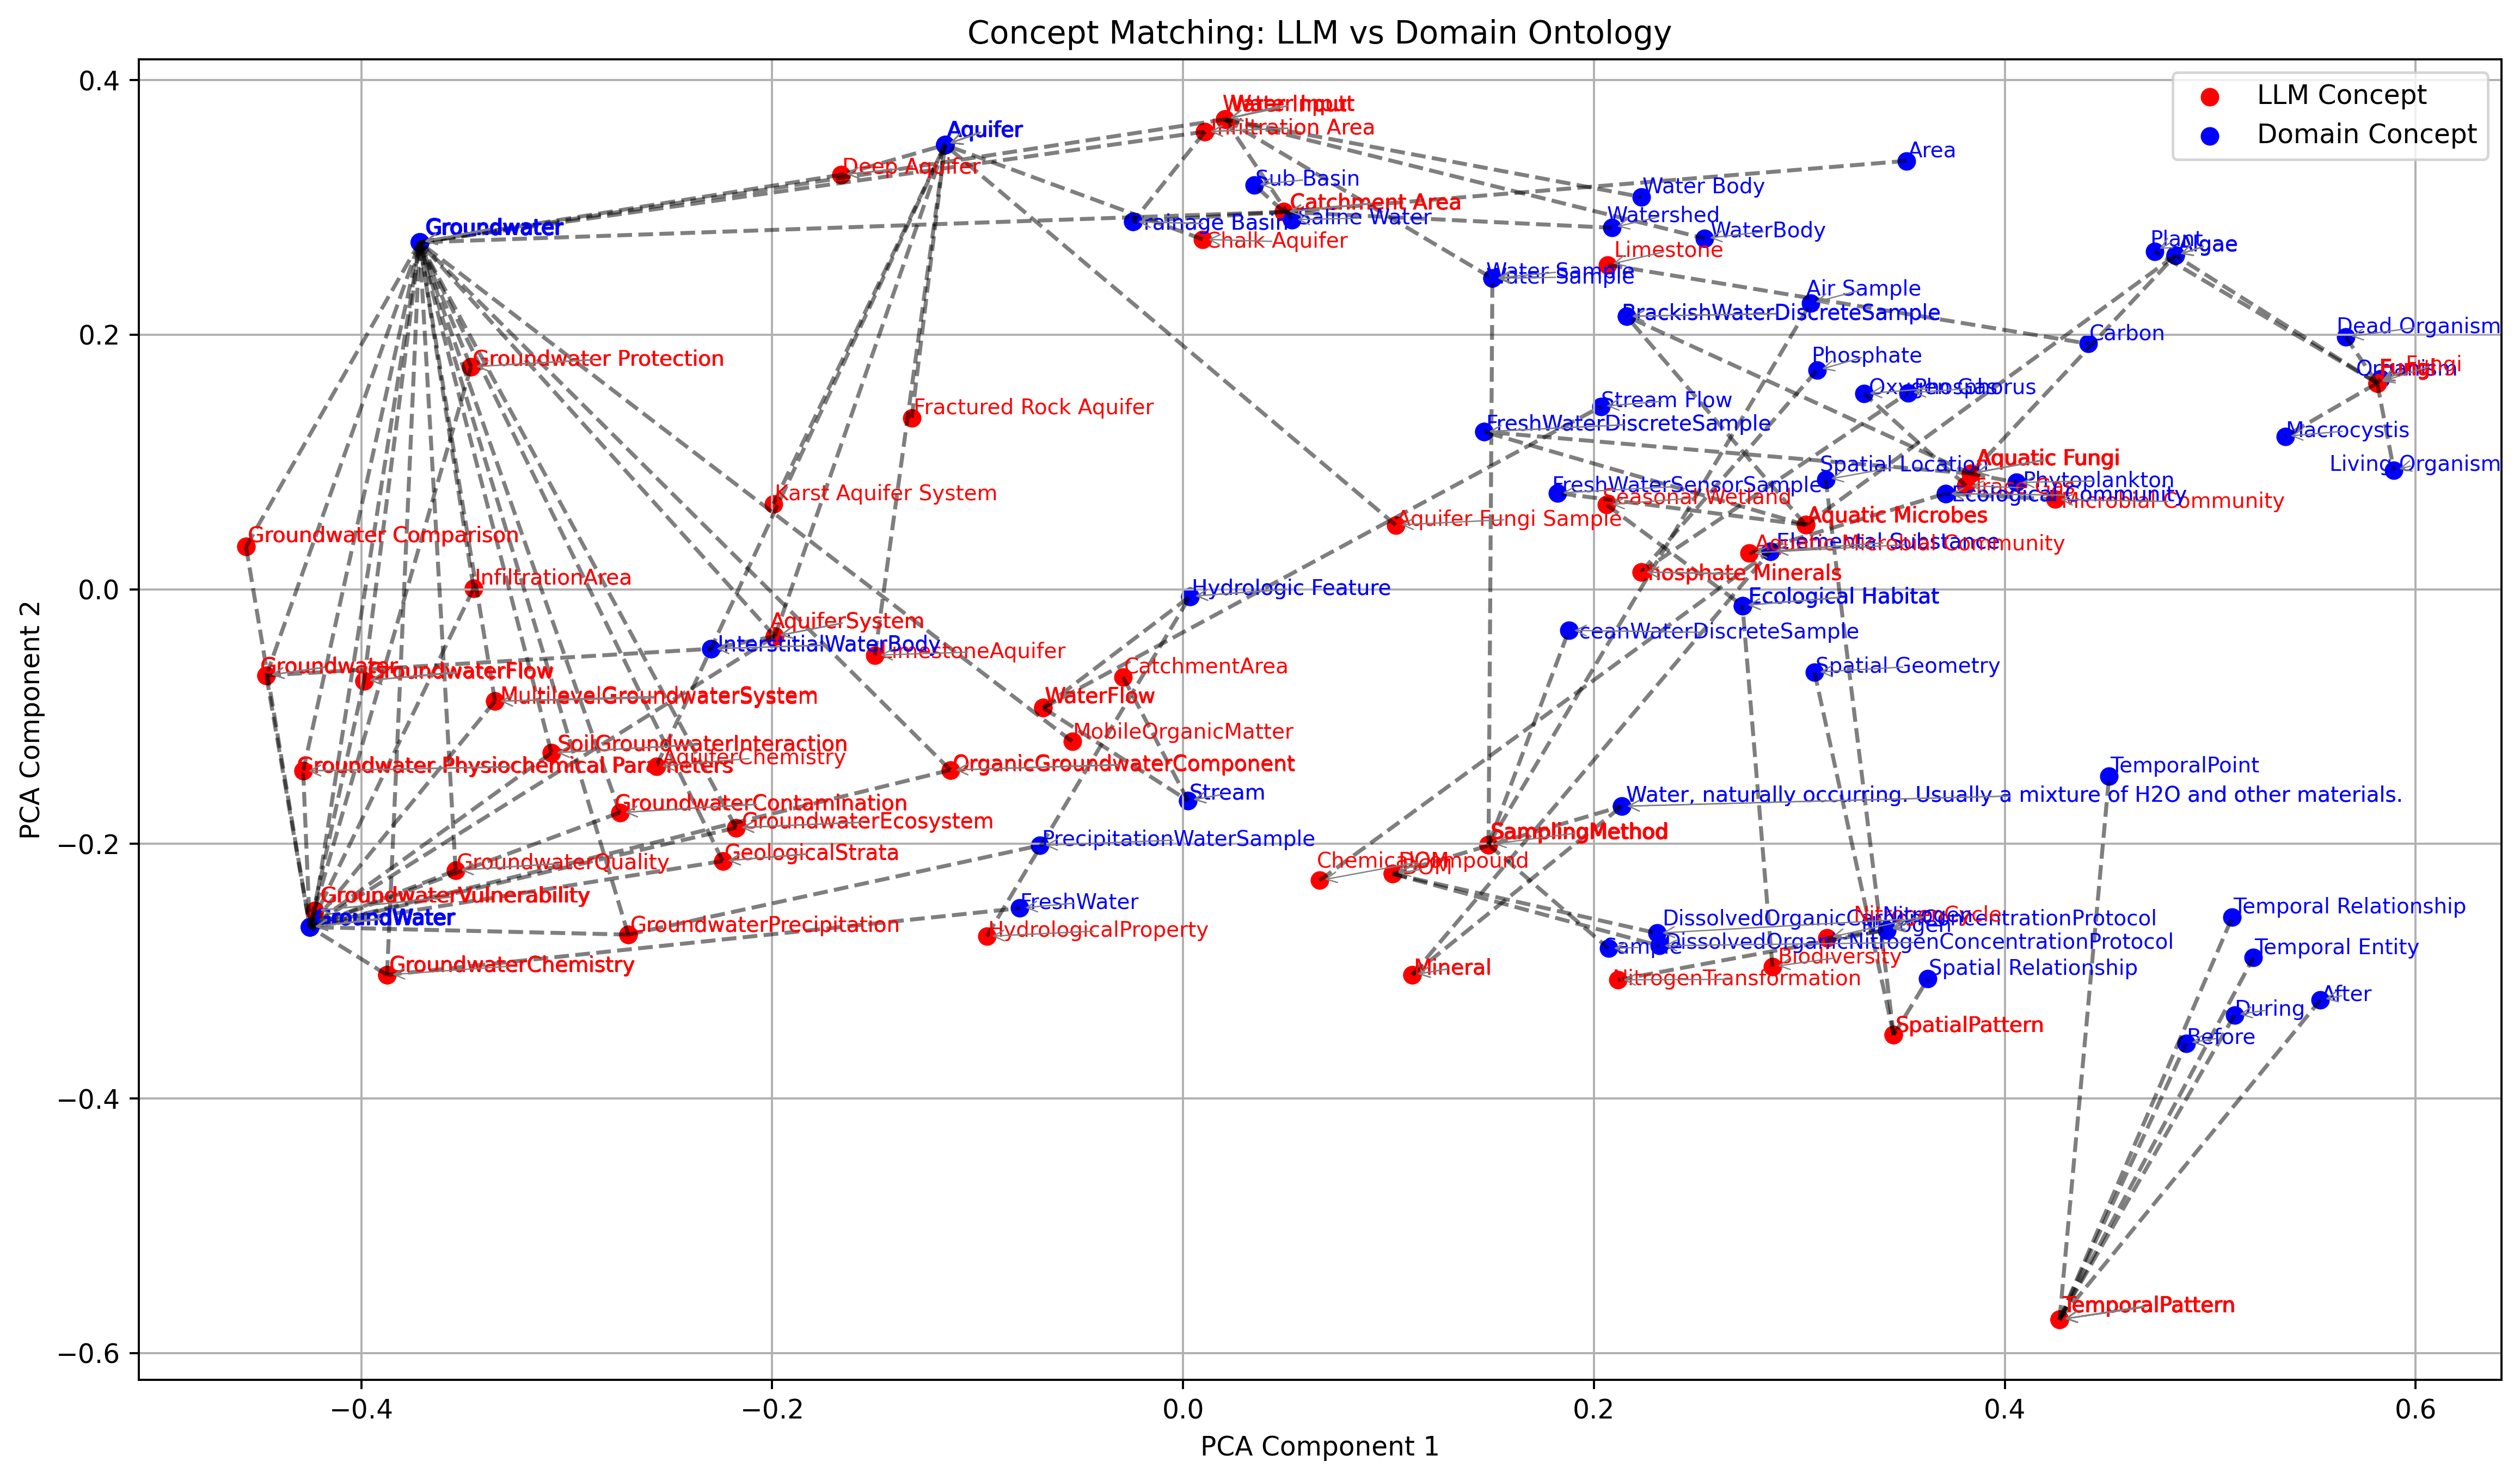

In [41]:
plot_matched_concepts(matched_pairs)

In [22]:
# Plot the matched pairs interactively
interactive_plot_matched_concepts(matched_pairs)